In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import colors

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

import iris
import iris.plot as iplt
from eofs.iris import Eof

/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


## Upload data

In [2]:
# Upload E280
sst_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp')
sst_constraint1 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos')
sst_constraint2 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'THO')
sst_constraint3 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS')
sst_constraint4 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')

CCSM4_UoT_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/CCSM4-UoT' + '/timeseries/'+ 'CCSM4-UoT' +'_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
CESM2_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/CESM2' + '/timeseries/'+ 'CESM2' +'_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint3)
COSMOS_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/COSMOS' + '/timeseries/'+ 'COSMOS' +'_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
HadCM3_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/HadCM3' + '/timeseries/'+ 'HadCM3' +'_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint)
MIROC4m_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/MIROC4m' + '/timeseries/'+ 'MIROC4m' +'_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
NorESM1F_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/NorESM1-F' + '/timeseries/E280.SST.timeseries_no_ann_cycle.nc', sst_constraint4)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [3]:
# Upload E400
CCSM4_UoT_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/CCSM4-UoT/timeseries/CCSM4-UoT_E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint1)
CESM2_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/CESM2/timeseries/E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint3)
COSMOS_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/COSMOS/timeseries/E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint1)
HadCM3_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/HadCM3/timeseries/HadCM3_E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint)
MIROC4m_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/MIROC4m/timeseries/MIROC4m_E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint1)
NorESM1F_E400_SST = iris.load_cube('/nfs/hera1/earjcti/regridded/NorESM1-F/timeseries/NorESM1-F_E400.SST.0-100_timeseries_no_ann_cycle.nc', sst_constraint4)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

In [4]:
# Upload E280
sst_constraint = iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp')# HadCM3
sst_constraint1 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos')# Utr, UoT,IPSL,MIROC,HadGEM3
sst_constraint3 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS') # CESM, CCSM
sst_constraint4 = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')# NorESM, EC-Earth

CCSM4_UoT_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/CCSM4-UoT/timeseries/CCSM4-UoT_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
CESM2_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/CESM2/timeseries/CESM2_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint3)
COSMOS_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/COSMOS/timeseries/COSMOS_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
HadCM3_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/HadCM3/timeseries/HadCM3_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint)
MIROC4m_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/MIROC4m/timeseries/MIROC4m_E280.SST.timeseries_no_ann_cycle.nc', sst_constraint1)
NorESM1F_E280 = iris.load_cube('/nfs/hera1/earjcti/regridded/NorESM1-F/timeseries/E280.SST.timeseries_no_ann_cycle.nc', sst_constraint4)


/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to 

## Subset the Pacific

In [5]:
# Delimit the region for the cube
min_lat = -60.0
max_lat = 70.0
min_lon = 120.0
max_lon = 290.0

# Functions to identify latitudes and longitudes we want to subset to
def pacific_lat(input):
    return min_lat  <= input <= max_lat 
def pacific_lon(input):
    return min_lon  <= input <= max_lon 

pacific_con = iris.Constraint(latitude = pacific_lat, longitude = pacific_lon)
# Subset the cube to the location of interest
MODELNAMES_E400 = [CCSM4_UoT_E400_SST, CESM2_E400_SST, COSMOS_E400_SST, HadCM3_E400_SST, MIROC4m_E400_SST, NorESM1F_E400_SST]
MODELNAMES_PI = [CCSM4_UoT_E280,CESM2_E280,COSMOS_E280,HadCM3_E280,MIROC4m_E280,NorESM1F_E280]
    
pacific_e400_subset = []
for j in MODELNAMES_E400:
    pacific_sub = pacific_con.extract(j)
    pacific_e400_subset.append(pacific_sub)
    
pacific_pi_subset = []
for j in MODELNAMES_PI:
    pacific_pi_sub = pacific_con.extract(j)
    pacific_pi_subset.append(pacific_pi_sub)

## Compute EOF1 for E280 and E400 (Figure S4)

In [6]:
## Functions to calculate EOFs   

def eofs_calc_e400 (model_number):
    if not pacific_e400_subset[model_number].coord('latitude').has_bounds():
            pacific_e400_subset[model_number].coord('latitude').guess_bounds()
    if not pacific_e400_subset[model_number].coord('longitude').has_bounds():
            pacific_e400_subset[model_number].coord('longitude').guess_bounds()
    solver = Eof(pacific_e400_subset[model_number], weights=None, center=True)
    eofs = solver.eofsAsCovariance(neofs=1)
    pcs_pi  = solver.pcs(npcs=1)
    varF_pi = solver.varianceFraction(neigs=1)
    eof_std1_pi = eofs.collapsed(('latitude','longitude'), iris.analysis.STD_DEV)
    eof_n1_pi = eofs/eof_std1_pi
    return (eof_n1_pi, pcs_pi, varF_pi)

def eofs_calc_pi (model_number):
    
    if not pacific_pi_subset[model_number].coord('latitude').has_bounds():
            pacific_pi_subset[model_number].coord('latitude').guess_bounds()
    if not pacific_pi_subset[model_number].coord('longitude').has_bounds():
            pacific_pi_subset[model_number].coord('longitude').guess_bounds()
    solver = Eof(pacific_pi_subset[model_number], weights=None, center=True)
    eofs = solver.eofsAsCovariance(neofs=1)
    pcs_pi  = solver.pcs(npcs=1)
    varF_pi = solver.varianceFraction(neigs=1)
    eof_std1_pi = eofs.collapsed(('latitude','longitude'), iris.analysis.STD_DEV)
    eof_n1_pi = eofs/eof_std1_pi
    return (eof_n1_pi, pcs_pi, varF_pi)

In [7]:
#dimension 0: eof1, dimension 1: pcs, dimension 2: var
eofs_e400 = [] 
eofs_pi = []

for i in range(np.size(pacific_pi_subset)):  
    e400 = eofs_calc_e400(i)
    pi = eofs_calc_pi(i)

    eofs_e400.append(e400)
    eofs_pi.append(pi)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):


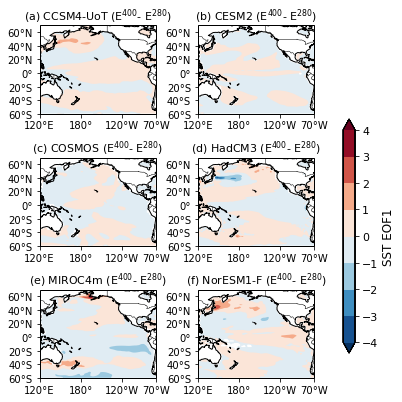

In [8]:
#Dif E400-E280
MODELNAMES = ['CCSM4-UoT', 'CESM2', 'COSMOS', 'HadCM3', 'MIROC4m', 'NorESM1-F']
letter1 = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ']

fig = plt.figure(figsize=(5.5, 13))
axes = []
for i in range(1,7):
    ax = fig.add_subplot(6, 2, i, projection=ccrs.PlateCarree(central_longitude=180.0, globe=None))
    axes.append(ax)

for (ax,n, l, name) in zip(axes, range(6), letter1, MODELNAMES):
    ax.add_feature(cartopy.feature.BORDERS, linewidth = 0.5)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_yticks(np.arange(-60, 80, 20))
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    ax.set_xticks([120, 180, 240, 290], crs=ccrs.PlateCarree())
    ax.set_xticklabels(['120°E', '180°', '120°W', '70°W'])
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    
    if n == 1 or n == 5:
        im = iplt.contourf(eofs_e400[n][0][0,:,:]*-1-eofs_pi[n][0][0,:,:], levels = np.arange(-4,4+1,1), axes = ax, cmap = 'RdBu_r', extend = 'both')
    elif n == 4:
        im = iplt.contourf(eofs_e400[n][0][0,:,:]*-1-eofs_pi[n][0][0,:,:]*-1, levels = np.arange(-4,4+1,1), axes = ax, cmap = 'RdBu_r', extend = 'both')
    else:
        im = iplt.contourf(eofs_e400[n][0][0,:,:]-eofs_pi[n][0][0,:,:], levels = np.arange(-4,4+1,1), axes = ax, cmap = 'RdBu_r', extend = 'both')
    
    ax.set_title(l + name + ' (E$^{400}$- E$^{280}$)', fontsize=11)
    cbar_ax = fig.add_axes([0.92, 0.55, 0.03, 0.25])#[left, bottom, width, height]
    fig.colorbar(im, cax=cbar_ax)
    fig.subplots_adjust(right=0.8)
    cbar_ax.set_ylabel('SST EOF1', size =12)
    cbar_ax.tick_params(labelsize=11)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.0001,hspace=0.5)
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/E400-E280_eof1_Pacific.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()